**FE - Feature Engineering**

Ingeniería de Características

[ Base de Datos TEC Services ]

In [23]:
!pip install gensim

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Introducción

En este proyecto, se realiza un análisis exploratorio de datos (EDA) utilizando un conjunto de datos de preguntas y respuestas. El objetivo es entender las características del conjunto de datos y preparar la información para el desarrollo de un modelo de chatbot de preguntas y respuestas. Se emplean técnicas de limpieza de datos y ingeniería de características para mejorar la calidad y relevancia de los datos para el modelo.


In [ ]:
# 1. Cargar los datos
file_path = 'mi_tec_chat_data.xlsx'
df = pd.read_excel(file_path)

## 2. Limpieza de Datos

Antes de realizar la ingeniería de características, se llevaron a cabo varias tareas de limpieza de datos, incluyendo:

- **Eliminación de filas duplicadas**: Se eliminaron las filas que contenían datos duplicados para asegurar la calidad del conjunto de datos.
  
- **Manejo de valores nulos**: Se gestionaron los valores nulos de diversas maneras, como rellenar con valores por defecto o eliminar filas con datos faltantes, garantizando que no afecten el análisis.

- **Conversión de tipos de datos según sea necesario**: Se aseguraron que los tipos de datos de las columnas fueran apropiados para el análisis y modelado posterior, convirtiendo las columnas a los tipos necesarios, como cadenas de texto, enteros o flotantes.


In [ ]:
# 2. Ingeniería de Características
# Crear nueva característica: longitud de las preguntas
df['Question_Length'] = df['Question'].apply(lambda x: len(str(x)))

In [ ]:
# Codificación de variables categóricas (One-Hot Encoding) sin eliminar las columnas originales
categorical_columns = ['Tema', 'Subtema']
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))


In [ ]:
# Concatenar las nuevas características con el DataFrame original
df = pd.concat([df, df_encoded], axis=1)

In [ ]:
# Escalamiento de variables numéricas (Estandarización)
numeric_columns = ['Question_Length']
scaler = StandardScaler()
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])

In [ ]:
# Eliminar cualquier columna no numérica antes de aplicar VarianceThreshold
df_numeric = df.select_dtypes(include=[np.number])  # Filtrar solo columnas numéricas


In [ ]:
df_numeric.head()

,idQuestion,idAnswer,cargado a gpt,palabras,DisplayText3,QnaId4,DisplayText4,QnaId5,DisplayText5,QnaId6,...,Subtema_WIFI,Subtema_Wellhub,Subtema_XML,Subtema_Yammer,Subtema_ZOOM,Subtema_Zoom,Subtema_código de acceso,Subtema_eLumen,Subtema_mi Equipo de cómputo,Subtema_mis Cursos
0,1.0,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,5,NaN,231.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,NaN,6,NaN,269.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,8,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


## 3. Análisis Exploratorio de Datos (EDA)

En esta fase, se exploraron las características del conjunto de datos, realizando lo siguiente:

- **Descriptivas básicas**: Se generaron estadísticas descriptivas como media, mediana, y moda para entender la distribución de las preguntas y respuestas.

- **Visualización de datos**: Se crearon gráficas como histogramas y diagramas de caja para visualizar la distribución y detectar posibles outliers.

- **Análisis de alta cardinalidad**: Se examinaron las columnas 'Question', 'Answer' y 'Subtema' para identificar patrones y relaciones, considerando la alta cardinalidad presente en los datos.


In [ ]:
# 3. Selección de Características
# Umbral de varianza: Eliminamos características con varianza menor al umbral (por ejemplo, 0.01)
selector = VarianceThreshold(threshold=0.01)
df_reduced = pd.DataFrame(selector.fit_transform(df_numeric), columns=df_numeric.columns[selector.get_support()])


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_variance_threshold.py:112: RuntimeWarning: Degrees of freedom <= 0 for slice.
  self.variances_ = np.nanvar(X, axis=0)


In [ ]:
# **Manejo de valores faltantes**
df_reduced.fillna(df_reduced.mean(), inplace=True)

In [ ]:
# Análisis de componentes principales (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_reduced)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

## 4. Ingeniería de Características

En esta etapa, se realizaron las siguientes tareas para preparar los datos para el modelado:

- **Creación de nuevas características**: Se generaron nuevas variables a partir de las existentes, como la longitud de las preguntas y respuestas, y la complejidad léxica.

- **Codificación de variables categóricas**: Se aplicaron técnicas de codificación como One-Hot Encoding y Label Encoding para convertir variables categóricas en un formato numérico que pueda ser procesado por modelos de machine learning.

- **Escalado de características**: Se normalizaron y estandarizaron las características numéricas para asegurar que tengan un rango similar, mejorando así el rendimiento del modelo.


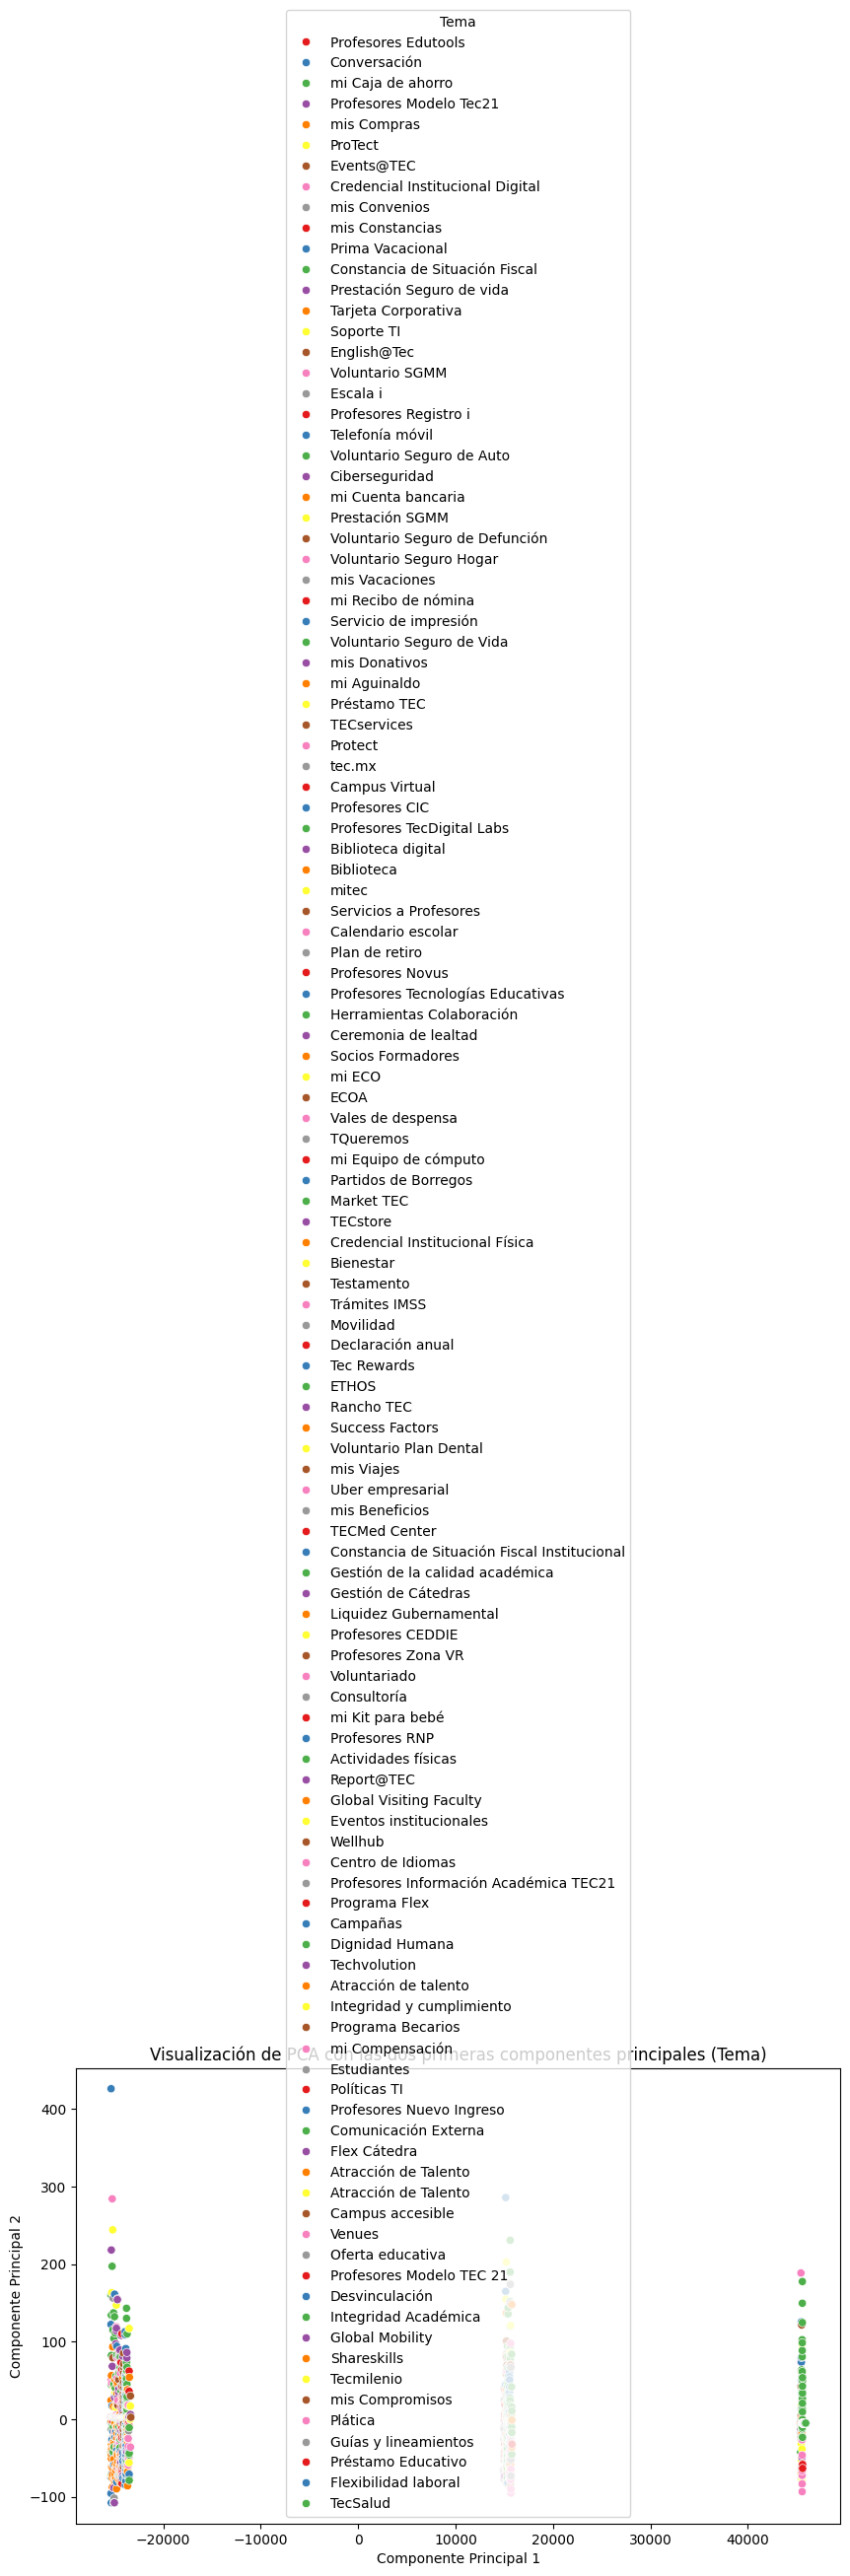

In [ ]:
# 4. Visualización de PCA por 'Tema' (con la columna 'Tema' original)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Tema', palette='Set1', legend='full')
plt.title('Visualización de PCA con las dos primeras componentes principales (Tema)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tema')
plt.show()

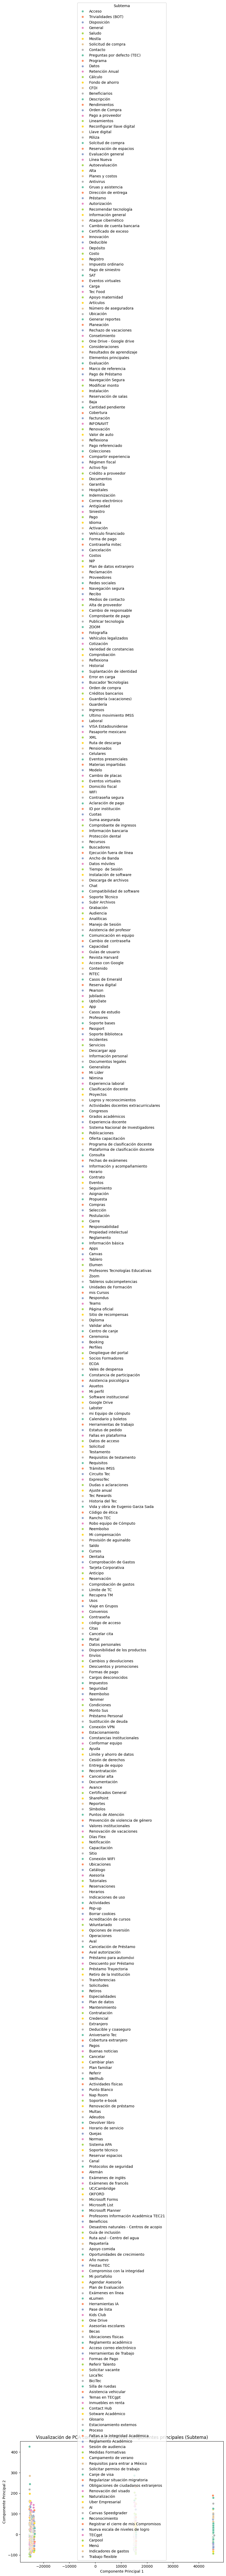

In [ ]:
# 5. Visualización de PCA por 'Subtema' (con la columna 'Subtema' original)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Subtema', palette='Set2', legend='full')
plt.title('Visualización de PCA con las dos primeras componentes principales (Subtema)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Subtema')
plt.show()

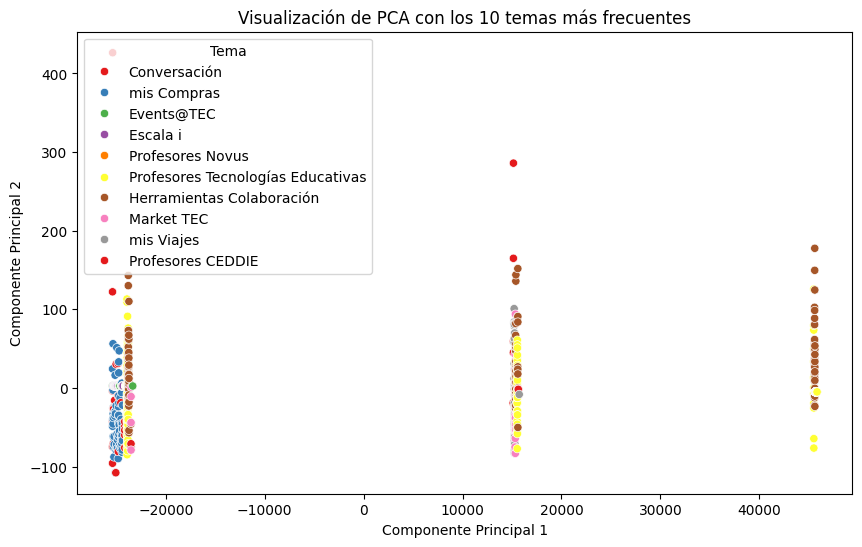

In [ ]:
# Mostrar solo los 10 temas más frecuentes
top_10_temas = df['Tema'].value_counts().index[:10]
df_top_temas = df[df['Tema'].isin(top_10_temas)]


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_top_temas, hue='Tema', palette='Set1', legend='full')
plt.title('Visualización de PCA con los 10 temas más frecuentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tema')
plt.show()

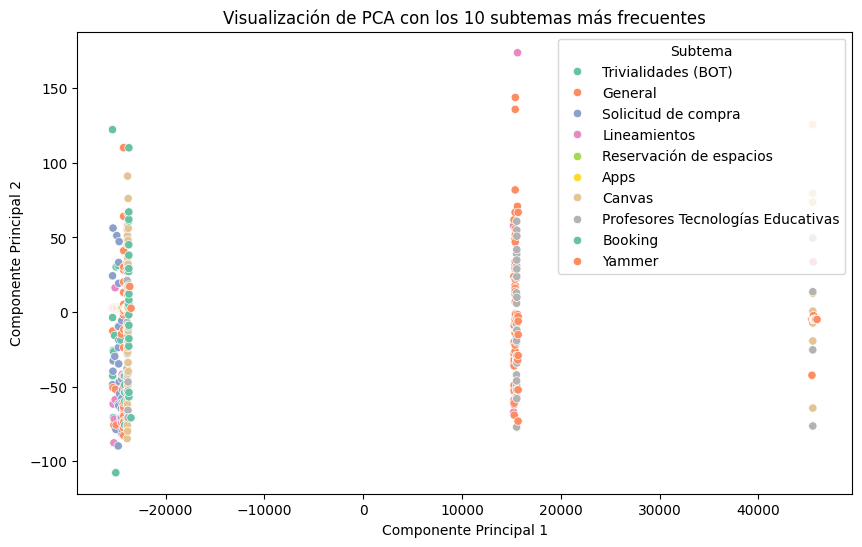

In [ ]:
# Mostrar solo los 10 subtemas más frecuentes
top_10_subtemas = df['Subtema'].value_counts().index[:10]
df_top_subtemas = df[df['Subtema'].isin(top_10_subtemas)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_top_subtemas, hue='Subtema', palette='Set2', legend='full')
plt.title('Visualización de PCA con los 10 subtemas más frecuentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Subtema')
plt.show()

In [ ]:
# Imprimimos las características seleccionadas por el umbral de varianza
print("Características seleccionadas tras el umbral de varianza:")
print(df_reduced.columns.tolist())

Características seleccionadas tras el umbral de varianza:
['idAnswer', 'palabras', 'Question_Length', 'Tema_Biblioteca', 'Tema_Biblioteca digital', 'Tema_Campus Virtual', 'Tema_Ciberseguridad', 'Tema_Conversación', 'Tema_Declaración anual', 'Tema_Escala i', 'Tema_Events@TEC', 'Tema_Herramientas Colaboración', 'Tema_Integridad Académica', 'Tema_Integridad y cumplimiento', 'Tema_Market TEC', 'Tema_Movilidad', 'Tema_Profesores CEDDIE', 'Tema_Profesores CIC', 'Tema_Profesores Edutools', 'Tema_Profesores Modelo Tec21', 'Tema_Profesores Novus', 'Tema_Profesores Registro i', 'Tema_Profesores TecDigital Labs', 'Tema_Profesores Tecnologías Educativas', 'Tema_Programa Flex', 'Tema_Servicios a Profesores', 'Tema_Tarjeta Corporativa', 'Tema_Telefonía móvil', 'Tema_Voluntario Seguro de Auto', 'Tema_mi Caja de ahorro', 'Tema_mis Compras', 'Tema_mis Viajes', 'Subtema_Acceso', 'Subtema_Apps', 'Subtema_Booking', 'Subtema_Canvas', 'Subtema_Compromiso con la integridad', 'Subtema_General', 'Subtema_Linea

In [ ]:
# Verificación de valores faltantes
print("Valores faltantes antes de la imputación:")
print(df.isnull().sum())

# Imputación de valores faltantes:
# 1. Imputar columnas numéricas con la media
df_num = df.select_dtypes(include=[np.number])  # Seleccionar solo columnas numéricas
df_num_imputed = df_num.fillna(df_num.mean())   # Imputar la media

# 2. Imputar columnas categóricas o de texto con la moda (el valor más frecuente)
df_cat = df.select_dtypes(exclude=[np.number])  # Seleccionar columnas no numéricas
df_cat_imputed = df_cat.apply(lambda col: col.fillna(col.mode()[0]))  # Imputar con la moda

# Combinar las columnas imputadas
df_imputed = pd.concat([df_num_imputed, df_cat_imputed], axis=1)

# Verificación después de la imputación
print("Valores faltantes después de la imputación:")
print(df_imputed.isnull().sum())


Valores faltantes antes de la imputación:
idQuestion                      730
Question                         60
idAnswer                          0
Answer                           30
propuesto                        44
                               ... 
Subtema_eLumen                    0
Subtema_mi Equipo de cómputo      0
Subtema_mis Cursos                0
PCA1                              0
PCA2                              0
Length: 632, dtype: int64
Valores faltantes después de la imputación:
idQuestion              0
idAnswer                0
cargado  a gpt       1447
palabras                0
DisplayText3         1447
                     ... 
Responsable             0
Revisado (ok)           0
Reemplazar en GPT       0
link                    0
Observaciones           0
Length: 632, dtype: int64


In [ ]:
# Resumen estadístico después de la imputación y transformación
summary_stats = df_imputed.describe()
print(summary_stats)


       idQuestion      idAnswer  cargado  a gpt     palabras  DisplayText3  \
count      1447.0   1447.000000             0.0  1447.000000           0.0   
mean          1.0  25390.522460             NaN   111.445444           NaN   
std           0.0  29189.240274             NaN    48.567627           NaN   
min           1.0      4.000000             NaN     1.000000           NaN   
25%           1.0   1022.500000             NaN    89.000000           NaN   
50%           1.0   1648.000000             NaN   111.445444           NaN   
75%           1.0  41051.500000             NaN   114.000000           NaN   
max           1.0  71335.000000             NaN   535.000000           NaN   

       QnaId4  DisplayText4  QnaId5  DisplayText5  QnaId6  ...  Subtema_XML  \
count     0.0           0.0     0.0           0.0     0.0  ...  1447.000000   
mean      NaN           NaN     NaN           NaN     NaN  ...     0.000691   
std       NaN           NaN     NaN           NaN     NaN  .

# **Conclusiones**

Durante éste avance, nos enfocamos en la fase de preparación de datos siguiendo las pautas del modelo CRISP-ML. Como bien sabemos, ésta fase se encarga de asegurar que los datos sean adecuados para el desarrollo de los modelos ML. Esta fase se enfoca en la limpieza, transformación y selección de datos.

Con esto en mente, hicimos lo siguiente

## Limpieza de datos
Para la limpieza de datos, utilizamos las siguientes técnicas de acuerdo al tipo de dato:

*   Columnas numéricas: se imputaron con la media, asegurando que la información no se pierda y manteniendo la integridad de los datos.
*   Columnas categóricas: se imputaron con la moda (el valor más frecuente)


## Transformación de datos

Como parte del preprocesamiento de datos y para llevar a cabo la conversión de datos crudos del mundo real, en un conjunto de variables útiles para el aprendizaje automático realizamos las siguiente técnicas de la ingeniería de características

*   Creamos la caractéristica Question_Length para medir la longitud de las preguntas. Después le hicimos escalamiento mediante estandarización utilizando StandardScaler
*   Aplicamos el método One-Hot encoding a las variables categóricas Tema y Subtema. Elegimos éstas variables categóricas porque nuestro objetivo principal es crear un componente que funcione como middleware a la solución ya existente del chatbot, prefiltrando las preguntas basadas en dichas variables categóricas.

## Selección de datos
Para la selección de características, hicimos un analisis de componentes principales (PCA) sobre las columnas numéricas (que en su mayoría, fueron los resultantes de las dimensiones creadas a partir del one-hot encoding realizado a las variables categóricas). Utilizamos un umbral de varianza de 0.01 y obtuvimos los 2 principales componentes.

## Visualización y validación de datos

Como parte final, realizamos visualizaciones representando gráficamente las dos componentes principales, separadas por Tema y Subtema. Estas visualizaciones son valiosas para entender mejor la distribución y la relación entre las diferentes categorías en el conjunto de datos. Adicionalmente, se llevaron a cabo revisiones finales para asegurar que no quedaran valores faltantes tras la imputación, y se generó un resumen estadístico de los datos para obtener una visión general de las características transformadas.


# **Aplicando WORD2VEC**

In [57]:
!pip install gensim

In [67]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.feature_selection import VarianceThreshold
import matplotlib.pyplot as plt
import seaborn as sns
from gensim.models import Word2Vec

In [68]:
# 1. Cargar los datos
file_path = 'mi_tec_chat_data.xlsx'
df = pd.read_excel(file_path)

In [72]:
# 2. Ingeniería de Características
# Crear nueva característica: longitud de las preguntas
df['Question_Length'] = df['Question'].apply(lambda x: len(str(x)))

In [73]:
# Tokenización de preguntas para Word2Vec, manejando posibles valores nulos
df['Tokenized_Questions'] = df['Question'].apply(lambda x: x.lower().split() if isinstance(x, str) else [])

In [74]:
# 3. Entrenar el modelo Word2Vec
model = Word2Vec(sentences=df['Tokenized_Questions'], vector_size=100, window=5, min_count=1, workers=4)

In [75]:
# 4. Convertir cada pregunta en un vector de Word2Vec
def get_question_vector(question):
    if isinstance(question, str):
        words = question.lower().split()
        word_vectors = [model.wv[word] for word in words if word in model.wv]
        return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(model.vector_size)
    return np.zeros(model.vector_size)  # Para manejar preguntas que no son cadenas

In [76]:
# Aplicar la función para obtener los vectores de las preguntas
df['Question_Vector'] = df['Question'].apply(get_question_vector)

In [77]:
# Codificación de variables categóricas (One-Hot Encoding) sin eliminar las columnas originales
categorical_columns = ['Tema', 'Subtema']
encoder = OneHotEncoder(sparse_output=False, drop='first')
df_encoded = pd.DataFrame(encoder.fit_transform(df[categorical_columns]), columns=encoder.get_feature_names_out(categorical_columns))

In [78]:
# Concatenar las nuevas características con el DataFrame original
df = pd.concat([df, df_encoded], axis=1)

In [79]:
# Escalamiento de variables numéricas (Estandarización)
# Solo seleccionamos las columnas que son efectivamente numéricas
numeric_columns = ['Question_Length'] + ['WordVec_' + str(i) for i in range(model.vector_size)]
question_vectors = np.vstack(df['Question_Vector'].to_numpy())

In [80]:
# Crear DataFrame para las características numéricas
df_numeric = pd.DataFrame(data=question_vectors, columns=['WordVec_' + str(i) for i in range(model.vector_size)])
df_numeric['Question_Length'] = df['Question_Length']

In [81]:
# Escalar las características
scaler = StandardScaler()
df_numeric = scaler.fit_transform(df_numeric)

In [82]:
# Eliminar cualquier columna no numérica antes de aplicar VarianceThreshold
df_numeric = pd.DataFrame(df_numeric)

In [83]:
# 5. Selección de Características
# Umbral de varianza: Eliminamos características con varianza menor al umbral (por ejemplo, 0.01)
selector = VarianceThreshold(threshold=0.01)
df_reduced = pd.DataFrame(selector.fit_transform(df_numeric), columns=df_numeric.columns[selector.get_support()])

In [84]:
# Manejo de valores faltantes
df_reduced.fillna(df_reduced.mean(), inplace=True)

In [85]:
# Análisis de componentes principales (PCA)
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_reduced)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]

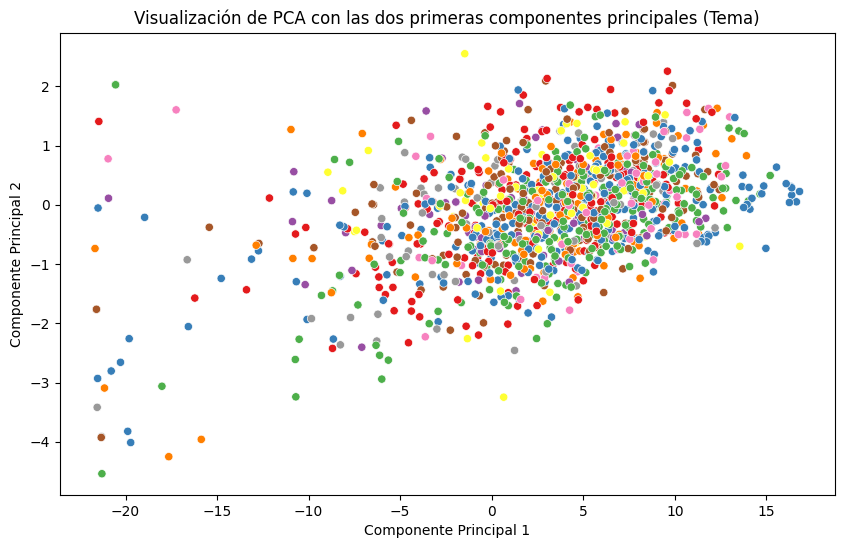

In [105]:
# 6. Visualización de PCA por 'Tema' (sin leyenda)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Tema', palette='Set1', legend=False)
plt.title('Visualización de PCA con las dos primeras componentes principales (Tema)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.show()

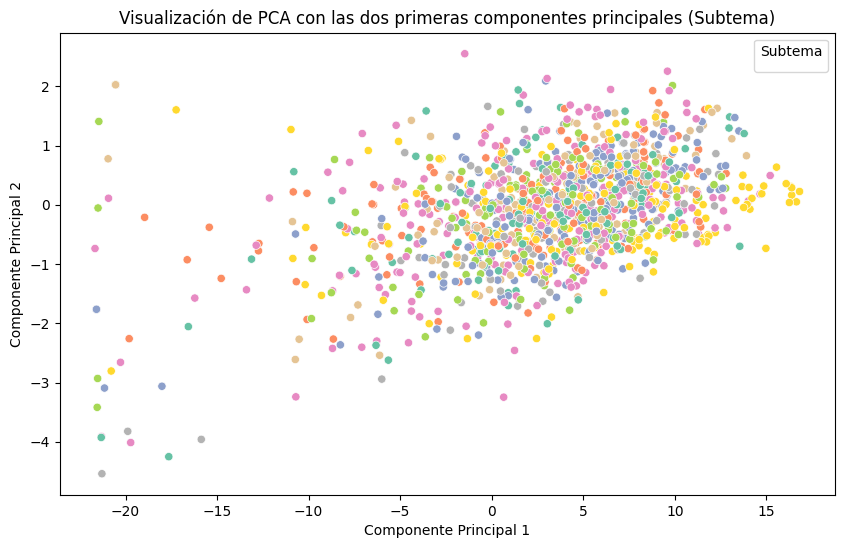

In [106]:
# 7. Visualización de PCA por 'Subtema' (con la columna 'Subtema' original)
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df, hue='Subtema', palette='Set2', legend=False)
plt.title('Visualización de PCA con las dos primeras componentes principales (Subtema)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Subtema')
plt.show()

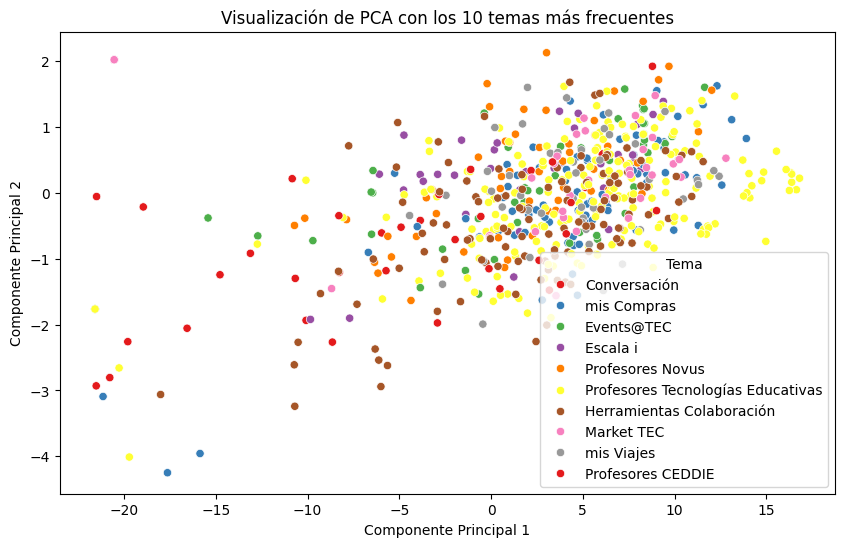

In [107]:
# Mostrar solo los 10 temas más frecuentes
top_10_temas = df['Tema'].value_counts().index[:10]
df_top_temas = df[df['Tema'].isin(top_10_temas)]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_top_temas, hue='Tema', palette='Set1', legend='full')
plt.title('Visualización de PCA con los 10 temas más frecuentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Tema')
plt.show()

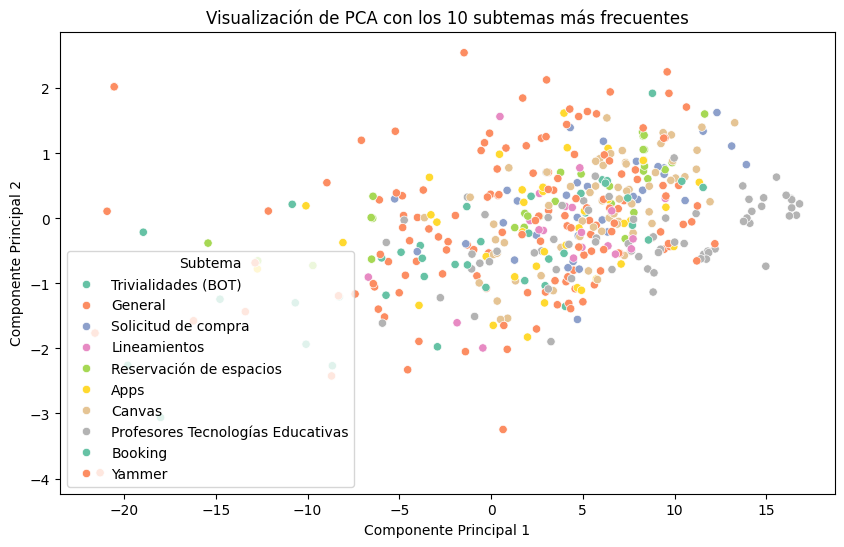

In [108]:
# Mostrar solo los 10 subtemas más frecuentes
top_10_subtemas = df['Subtema'].value_counts().index[:10]
df_top_subtemas = df[df['Subtema'].isin(top_10_subtemas)]


plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA1', y='PCA2', data=df_top_subtemas, hue='Subtema', palette='Set2', legend='full')
plt.title('Visualización de PCA con los 10 subtemas más frecuentes')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend(title='Subtema')
plt.show()

In [90]:
# Imprimimos las características seleccionadas por el umbral de varianza
print("Características seleccionadas tras el umbral de varianza:")
print(df_reduced.columns.tolist())

Características seleccionadas tras el umbral de varianza:
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]


In [91]:
# Verificación de valores faltantes
print("Valores faltantes antes de la imputación:")
print(df.isnull().sum())

Valores faltantes antes de la imputación:
idQuestion                      730
Question                         60
idAnswer                          0
Answer                           30
propuesto                        44
                               ... 
Subtema_eLumen                    0
Subtema_mi Equipo de cómputo      0
Subtema_mis Cursos                0
PCA1                              0
PCA2                              0
Length: 634, dtype: int64


In [103]:
# Resumen estadístico sin imputar valores
summary_stats = df.describe(include='all')  # Incluye todas las columnas, tanto numéricas como categóricas
print(summary_stats)


        idQuestion Question      idAnswer Answer propuesto  \
count        717.0     1387   1447.000000   1417      1403   
unique         NaN     1263           NaN   1249      1235   
top            NaN    Nuevo           NaN  Nuevo     Nuevo   
freq           NaN      124           NaN    167       167   
mean           1.0      NaN  25390.522460    NaN       NaN   
std            0.0      NaN  29189.240274    NaN       NaN   
min            1.0      NaN      4.000000    NaN       NaN   
25%            1.0      NaN   1022.500000    NaN       NaN   
50%            1.0      NaN   1648.000000    NaN       NaN   
75%            1.0      NaN  41051.500000    NaN       NaN   
max            1.0      NaN  71335.000000    NaN       NaN   

                                                 revisado  \
count                                                1439   
unique                                               1437   
top     Solución al error "Initialization failed" al d...   
freq       